> ### Create a new data folder with augmented & original images/labels

In [2]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
import uuid

In [ ]:
def load_img(img_path: str) -> np.ndarray:
    """
        Load image from path
    """
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [ ]:
def load_mask(mask_path: str) -> np.ndarray:
    """
        Load mask from path
    """
    
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    return mask

In [ ]:
def visualise(img_path: str, mask_path: str) -> None:
    """
        Visualise image and corresponding mask
    """

    img = load_img(img_path)
    mask = load_mask(mask_path)
    
    _, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[1].imshow(mask, cmap='gray')
    plt.show()

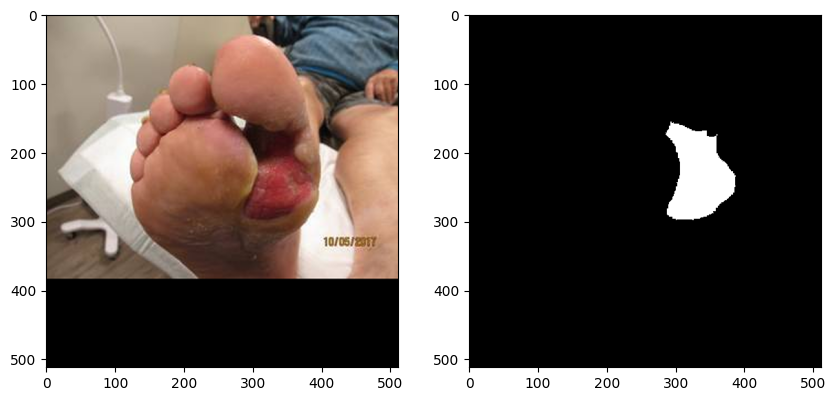

In [9]:
visualise('data/train/images/0011.png', 'data/train/labels/0011.png')

In [ ]:
# def preprocess_img(img: np.ndarray) -> np.ndarray:
#     img = img / 255.0
#     return img

# def preprocess_mask(mask: np.ndarray) -> np.ndarray:
#     mask = mask / 255.0
#     return mask

# def preprocess(img: np.ndarray, mask: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
#     img = preprocess_img(img)
#     mask = preprocess_mask(mask)
#     return img, mask

In [ ]:
# def load_preprocess(img_path: str, mask_path: str) -> tuple[np.ndarray, np.ndarray]:
#     img = load_img(img_path)
#     mask = load_mask(mask_path)
    
#     return preprocess(img, mask)

In [10]:
# # check if preprocess works
# img, mask = load_preprocess('data/train/images/0011.png', 'data/train/labels/0011.png')
# print(img.shape, mask.shape)
# plt.imshow(mask, cmap='gray')
# plt.show()

In [ ]:
# define augmentations for training

augmentations = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.RandomBrightnessContrast(p=0.2)
    ]
)

In [ ]:
def apply_augmentations(img: np.ndarray, mask: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
        Apply augmentations to image and mask
    """
    
    augmented = augmentations(image=img, mask=mask)
    img = augmented['image']
    mask = augmented['mask']
    return img, mask

In [ ]:
# perform augmentations on all training images, masks and save them using uuid names
# ! use same name for image and mask

def augement_save_images_masks(train_data_dir: str, n_augments=5) -> None:
    """
        Augment images and masks and save them to a new directory
    """

    # get image and mask directories    
    img_dir = os.path.join(train_data_dir, 'images')
    mask_dir = os.path.join(train_data_dir, 'labels')

    # create dirs to store augmented images
    aug_img_dir = os.path.join(train_data_dir, 'augmented_images')
    aug_mask_dir = os.path.join(train_data_dir, 'augmented_labels')

    os.makedirs(aug_img_dir, exist_ok=True)
    os.makedirs(aug_mask_dir, exist_ok=True)

    # get image and mask files and sort them
    img_files = sorted(os.listdir(img_dir))
    mask_files = sorted(os.listdir(mask_dir))

    # loop through images and masks pairs
    for img_file, mask_file in zip(img_files, mask_files):
        img_path = os.path.join(img_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        # load images and masks
        img = load_img(img_path)
        mask = load_mask(mask_path)

        for _ in range(n_augments):
            # apply augmentations
            img_aug, mask_aug = apply_augmentations(img, mask)

            # save augmented images and masks
            id = uuid.uuid4()
            img_aug_path = os.path.join(aug_img_dir, f'{id}.png')
            mask_aug_path = os.path.join(aug_mask_dir, f'{id}.png')

            cv2.imwrite(img_aug_path, cv2.cvtColor(img_aug, cv2.COLOR_RGB2BGR))
            cv2.imwrite(mask_aug_path, mask_aug)

    print(".....Augmentation and saving done.....")


In [12]:
augement_save_images_masks('data/train')

.....Augmentation and saving done.....


(512, 512, 3) (512, 512)


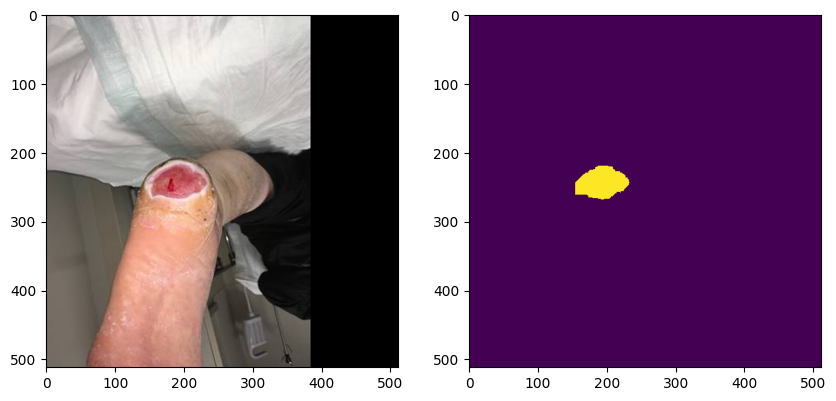

In [13]:
# check shapes of augmented images and masks
i = cv2.imread('data/train/augmented_images/0a1b4f03-6574-471a-94f0-684227b97e53.png')
m = cv2.imread('data/train/augmented_labels/0a1b4f03-6574-471a-94f0-684227b97e53.png', cv2.IMREAD_GRAYSCALE)

# shapes
print(i.shape, m.shape)
# show augmented image and mask
_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
ax[1].imshow(m)
plt.show()

In [ ]:
def final_data_folders(train_data_dir: str) -> None:
    """
        Create final data folders including original and augmented images and masks
    """
    
    # get original image and mask directories
    img_dir = os.path.join(train_data_dir, 'images')
    mask_dir = os.path.join(train_data_dir, 'labels')

    # augmented image and mask directories
    aug_img_dir = os.path.join(train_data_dir, 'augmented_images')
    aug_mask_dir = os.path.join(train_data_dir, 'augmented_labels')

    # new dirs
    final_img_dir = os.path.join(train_data_dir, 'final_images')
    final_mask_dir = os.path.join(train_data_dir, 'final_labels')

    # create new dirs
    os.makedirs(final_img_dir, exist_ok=True)
    os.makedirs(final_mask_dir, exist_ok=True)

    # copy original images and masks
    for img_file, mask_file in zip(sorted(os.listdir(img_dir)), sorted(os.listdir(mask_dir))):
        img_path = os.path.join(img_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        # copy
        os.system(f'cp {img_path} {final_img_dir}')
        os.system(f'cp {mask_path} {final_mask_dir}')

    # copy aug images and masks
    for img_file, mask_file in zip(sorted(os.listdir(aug_img_dir)), sorted(os.listdir(aug_mask_dir))):
        img_path = os.path.join(aug_img_dir, img_file)
        mask_path = os.path.join(aug_mask_dir, mask_file)

        # copy
        os.system(f'cp {img_path} {final_img_dir}')
        os.system(f'cp {mask_path} {final_mask_dir}')

    print(".....Final data folders created.....")

In [15]:
final_data_folders('data/train')

.....Final data folders created.....


(512, 512, 3)


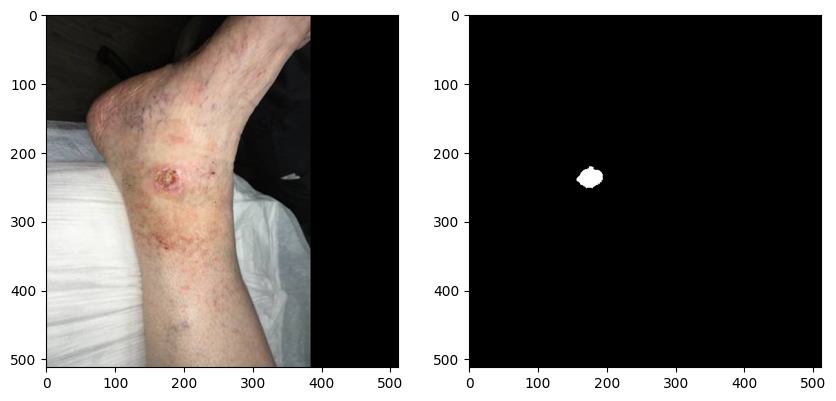

(512, 512, 3)


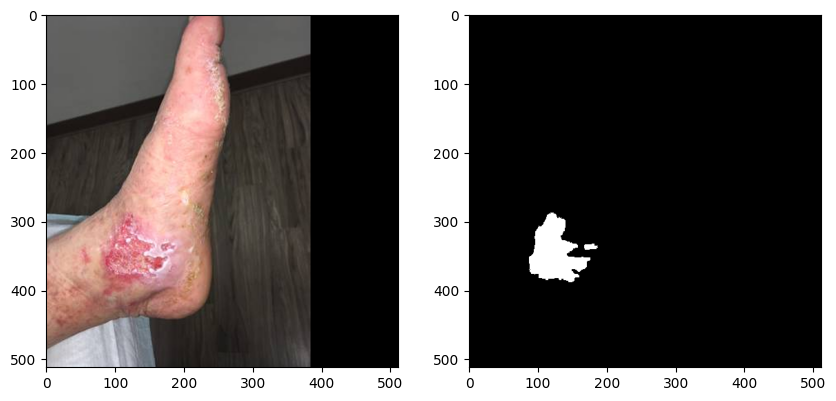

(512, 512, 3)


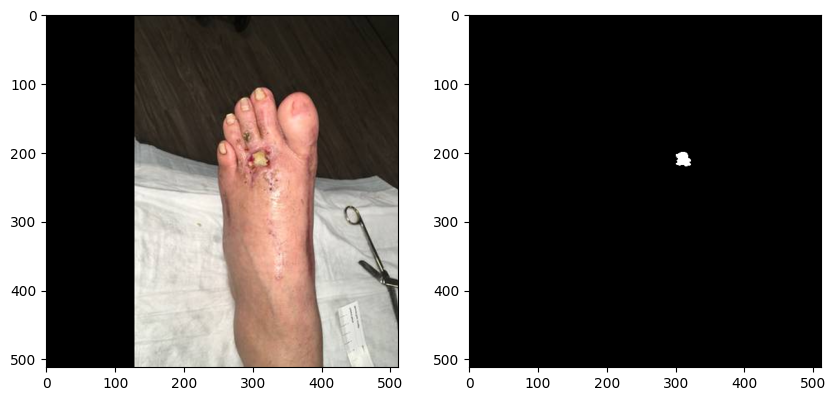

(512, 512, 3)


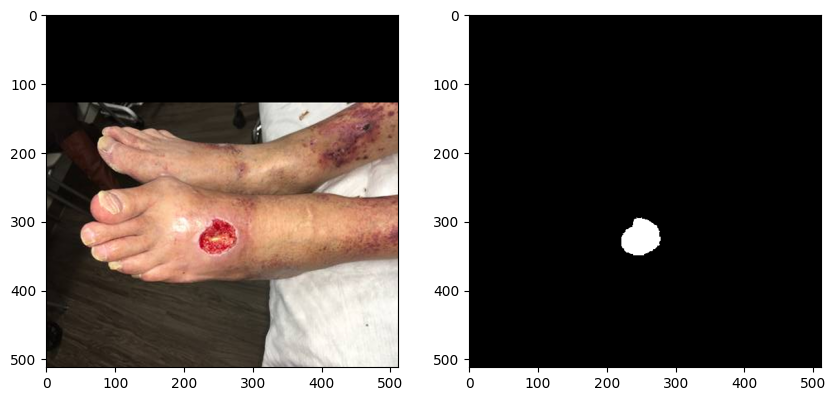

(512, 512, 3)


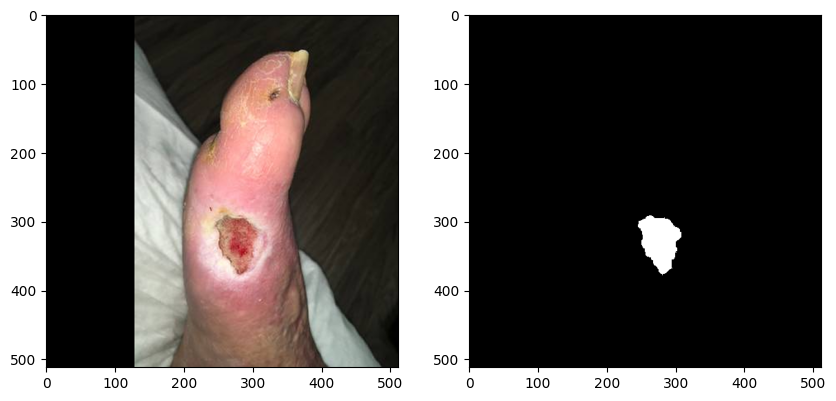

In [16]:
# check if final data are mapped correctly

count = 0

for img_file, mask_file in zip(os.listdir('data/train/final_images'), os.listdir('data/train/final_labels')):
    img_path = os.path.join('data/train/final_images', img_file)
    mask_path = os.path.join('data/train/final_labels', mask_file)

    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    print(mask.shape)

    count += 1

    _, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[1].imshow(mask)
    plt.show()

    if count == 5:
        break

> ### Creating a tf dataset loader

In [17]:
# read images using tf
img = tf.io.read_file("data/train/images/0041.png")
img.dtype

I0000 00:00:1742509243.601733 1049833 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


tf.string

In [18]:
# decode
img = tf.io.decode_image(img, channels=3, dtype=tf.float32)

In [19]:
img = tf.image.resize(img, (256, 256))

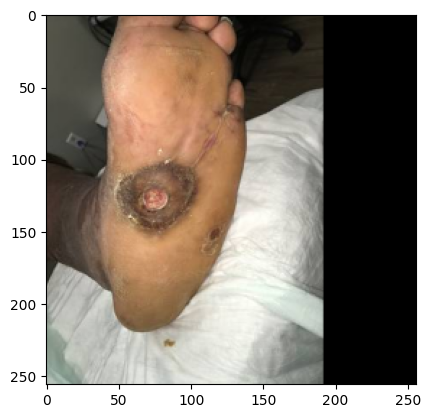

In [20]:
plt.imshow(img)

In [21]:
# read mask
mask = tf.io.read_file("data/train/labels/0041.png")
mask.dtype

tf.string

In [22]:
mask = tf.io.decode_image(mask, channels=1)

In [23]:
bin_mask = tf.cast(tf.greater(mask, 128), tf.float32)

In [29]:
(bin_mask == 0).numpy().sum(), (bin_mask == 1).numpy().sum()

(np.int64(261545), np.int64(599))

In [32]:
(bin_mask == 0).numpy().sum() + (bin_mask == 1).numpy().sum()

np.int64(262144)

In [30]:
512 * 512

262144

In [33]:
# ! read masks as grayscale !

class Dataset:
    """
        Class to encapsulate dataset creation & loading ops.
    """

    def __init__(self, dir: str, image_size: tuple[int, int], batch_size: int, shuffle: bool = True, shuffle_buffer_size: int = 200) -> None:
        """
            Initialize the dataset.

            Args:
                dir: path to directory containing images and masks
                image_size: size to resize images and masks
                batch_size: batch size
                shuffle: whether to shuffle dataset
                shuffle_buffer_size: buffer size for shuffle function
        """

        self.dir = dir
        self.image_size = image_size
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.shuffle_buffer_size = shuffle_buffer_size

    def _get_img_paths(self) -> list:
        """
            Get a list of image paths.
        """
        return sorted(
            [
                os.path.join(self.dir, "final_images", file)
                for file in os.listdir(os.path.join(self.dir, "final_images"))
            ]
        )

    
    def _get_mask_paths(self) -> list:
        """
            Get a list of mask paths.
        """
        return sorted(
            [
                os.path.join(self.dir, "final_labels", file)
                for file in os.listdir(os.path.join(self.dir, "final_labels"))
            ]
        )

    def preprocess(self, image: tf.Tensor, mask: tf.Tensor) -> tuple[tf.Tensor, tf.Tensor]:
        """
            Resize image and mask to image_size,
            Normalise image & binarise mask.

            Args:
                image: image tensor
                mask: mask tensor
        """

        # resize
        image = tf.image.resize(image, self.image_size)
        mask = tf.image.resize(mask, self.image_size)

        # normalise image
        image = tf.cast(image, tf.float32) / 255.0

        # binarise mask
        mask = tf.cast(tf.greater(mask, 128), tf.float32)

        return image, mask
    
    def load_preprocess_image_mask(self, img_path: str, mask_path: str) -> tuple[tf.Tensor, tf.Tensor]:
        """
            Loads & preprocesses an image, mask pair.

            Args:
                img_path: path to image
                mask_path: path to mask
        """

        #!NOTE - used tf.ensure_shape to prevent ValueError: 'images' contains no shape, by explicitly setting height, width dims. 
        #! This occurs becz the tf.image.resize 
        #! func expects tensors with defined rank, but the tensor produced by tf.io.decode_image are dynamic where height, width 
        #! are determined at runtime. 

        # read image
        img = tf.io.read_file(img_path)
        img = tf.io.decode_image(img, channels=3, expand_animations=False)
        img = tf.ensure_shape(img, [None, None, 3]) 

        # read mask (as grayscale!)
        mask = tf.io.read_file(mask_path)
        mask = tf.io.decode_image(mask, channels=1, expand_animations=False)
        mask = tf.ensure_shape(mask, [None, None, 1])

        # return preprocessed image and mask
        return self.preprocess(img, mask)

    def create(self) -> tf.data.Dataset:
        """
            Create tensorflow dataset.
        """
        # Get image and mask paths
        img_paths = self._get_img_paths()
        mask_paths = self._get_mask_paths()

        # create dataset from paths
        paths_dataset = tf.data.Dataset.from_tensor_slices((img_paths, mask_paths))

        # shuffle
        if self.shuffle:
            paths_dataset = paths_dataset.shuffle(
                buffer_size = self.shuffle_buffer_size or len(img_paths)
            )

        # map preprocessing 
        dataset = paths_dataset.map(
            self.load_preprocess_image_mask,
            num_parallel_calls = tf.data.AUTOTUNE
        )

        # batch and prefetch
        dataset = dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE)

        return dataset
    
    def show_samples(self, n_samples: int = 5) -> None:
        """
            Display a few samples.
            - Show image, mask and overlay per sample.

            Args:
                n_samples: number of samples to display
        """

        # create dataset    
        dataset = self.create()

        # get a batch
        for img_batch, mask_batch in dataset.take(1):
            # display upto n_samples
            n = min(n_samples, img_batch.shape[0])
            n_cols = 3

            plt.figure(figsize=(15, 5*n))

            for i in range(n):
                # display image
                plt.subplot(n, n_cols, i*n_cols + 1)
                plt.imshow(img_batch[i])
                plt.title(f"Image {i}")
                plt.axis('off')

                # display mask
                plt.subplot(n, n_cols, i*n_cols + 2)
                plt.imshow(mask_batch[i], cmap='gray')
                plt.title(f"Mask {i}")
                plt.axis('off')

                # display image with mask overlay
                plt.subplot(n, n_cols, i*n_cols + 3)

                # copy img to var _masked
                _masked = np.copy(img_batch[i].numpy())

                _mask = mask_batch[i].numpy()

                # add a red overlay where mask is 1
                red = np.array([1.0, 0.0, 0.0])
                inverted_binary_mask = 1 - _mask
                red_black_mask = _mask * red

                _masked = (_masked * inverted_binary_mask) + red_black_mask

                plt.imshow(_masked)
                plt.title(f"Overlay {i+1}")
                plt.axis('off')

            plt.tight_layout()
            plt.show()

In [34]:
# create training and validation datasets

train_set = Dataset("data/train", image_size=(256,256), batch_size=4)

val_set = Dataset("data/validation", image_size=(256,256), batch_size=4, shuffle=False)

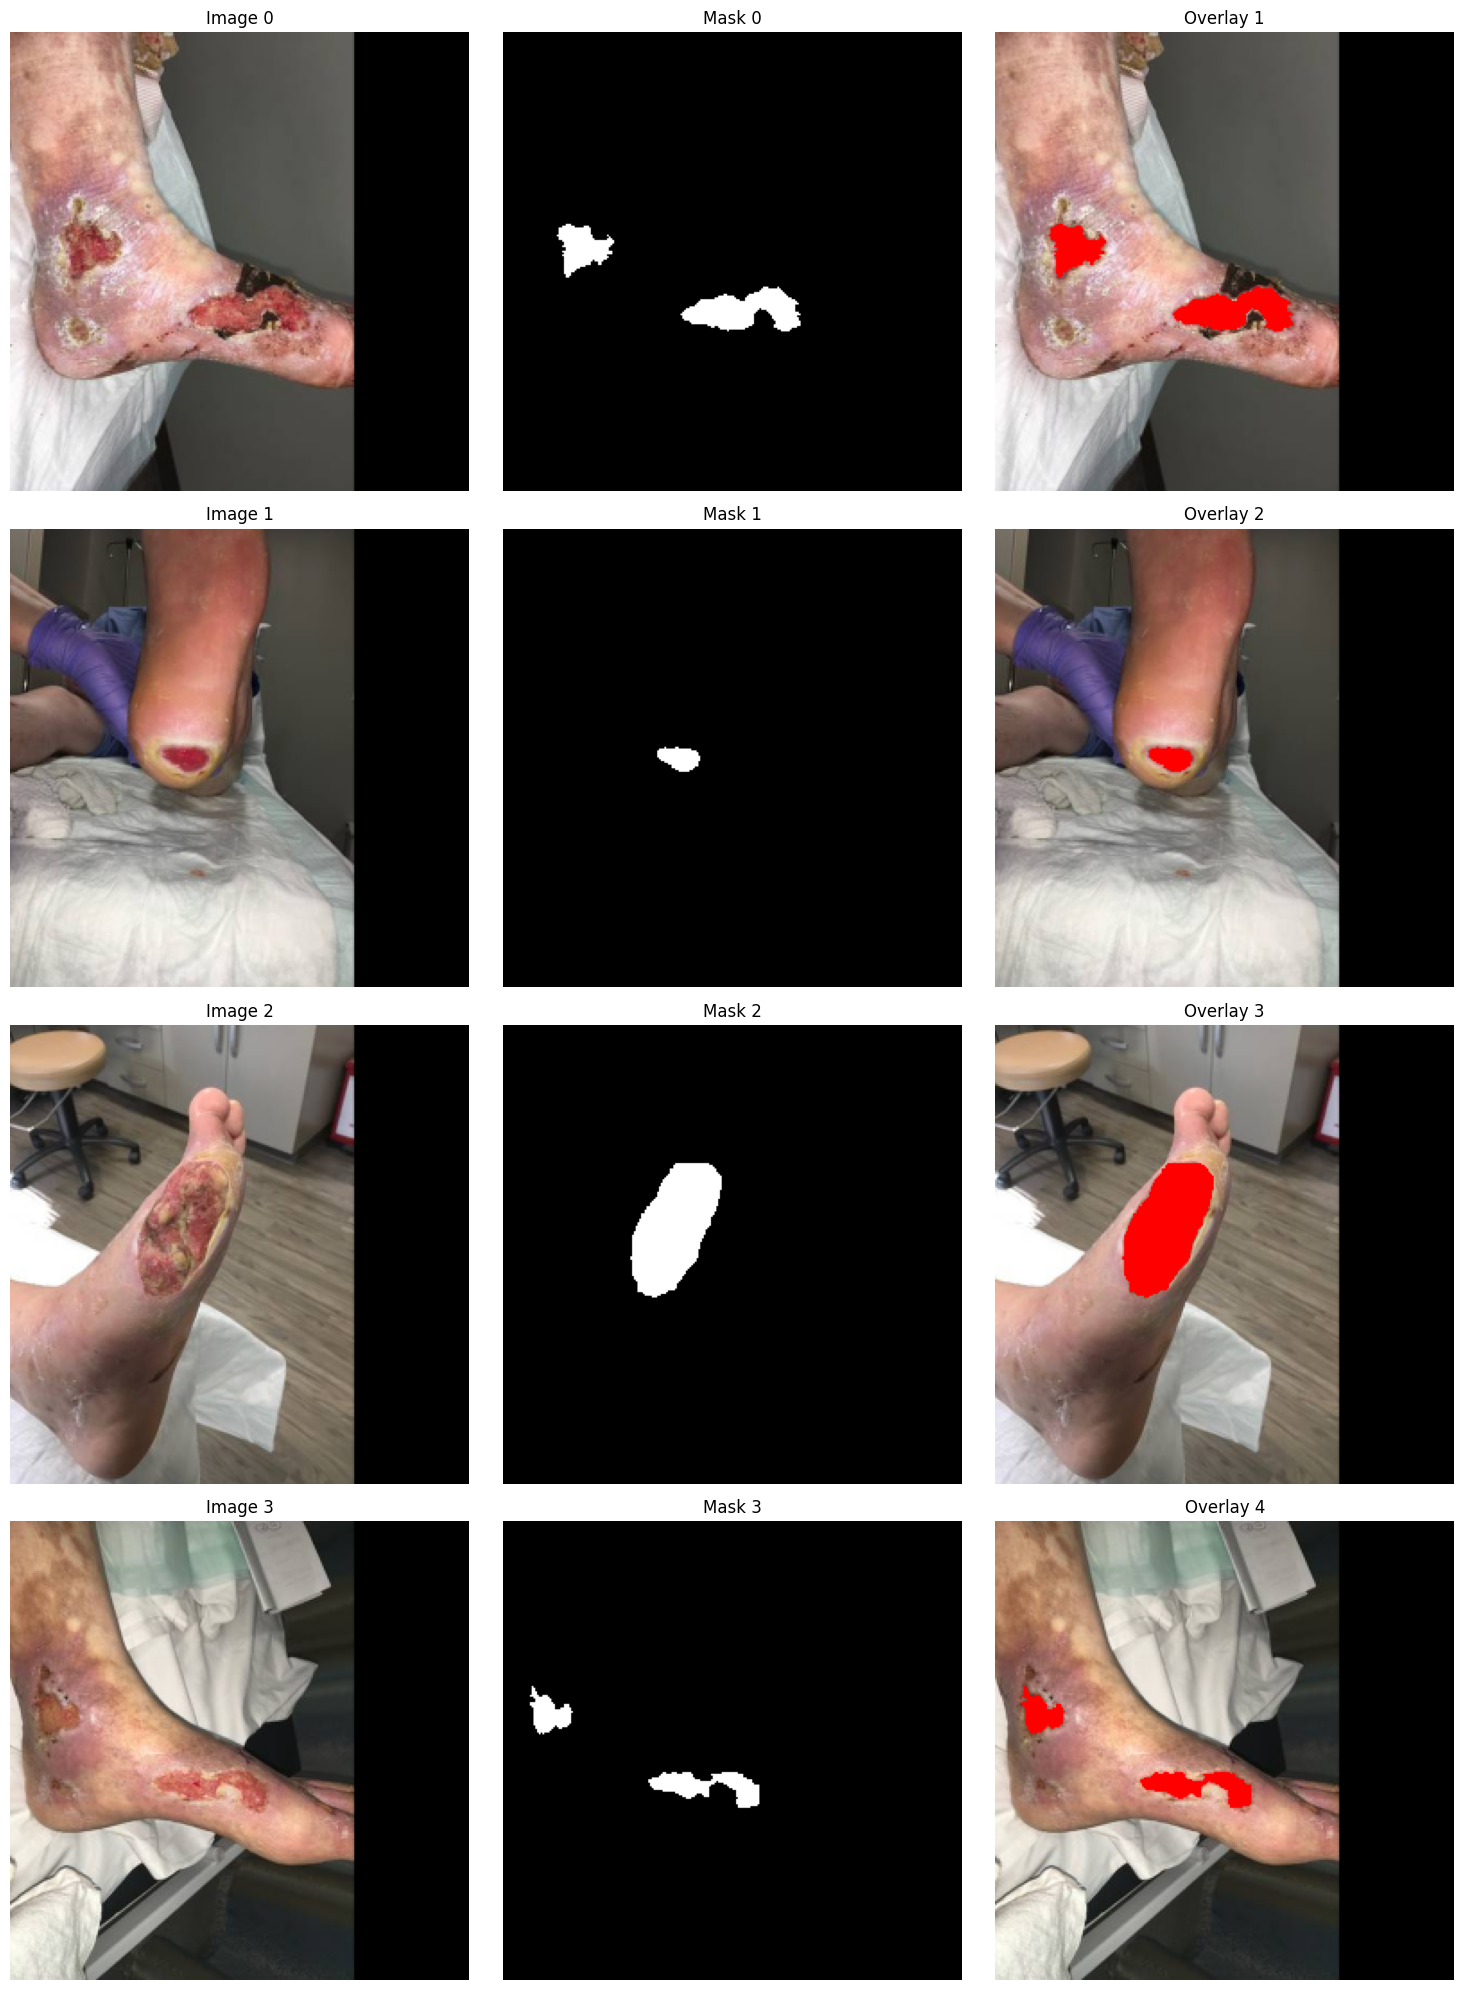

2025-03-21 09:34:50.043736: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
train_set.show_samples()

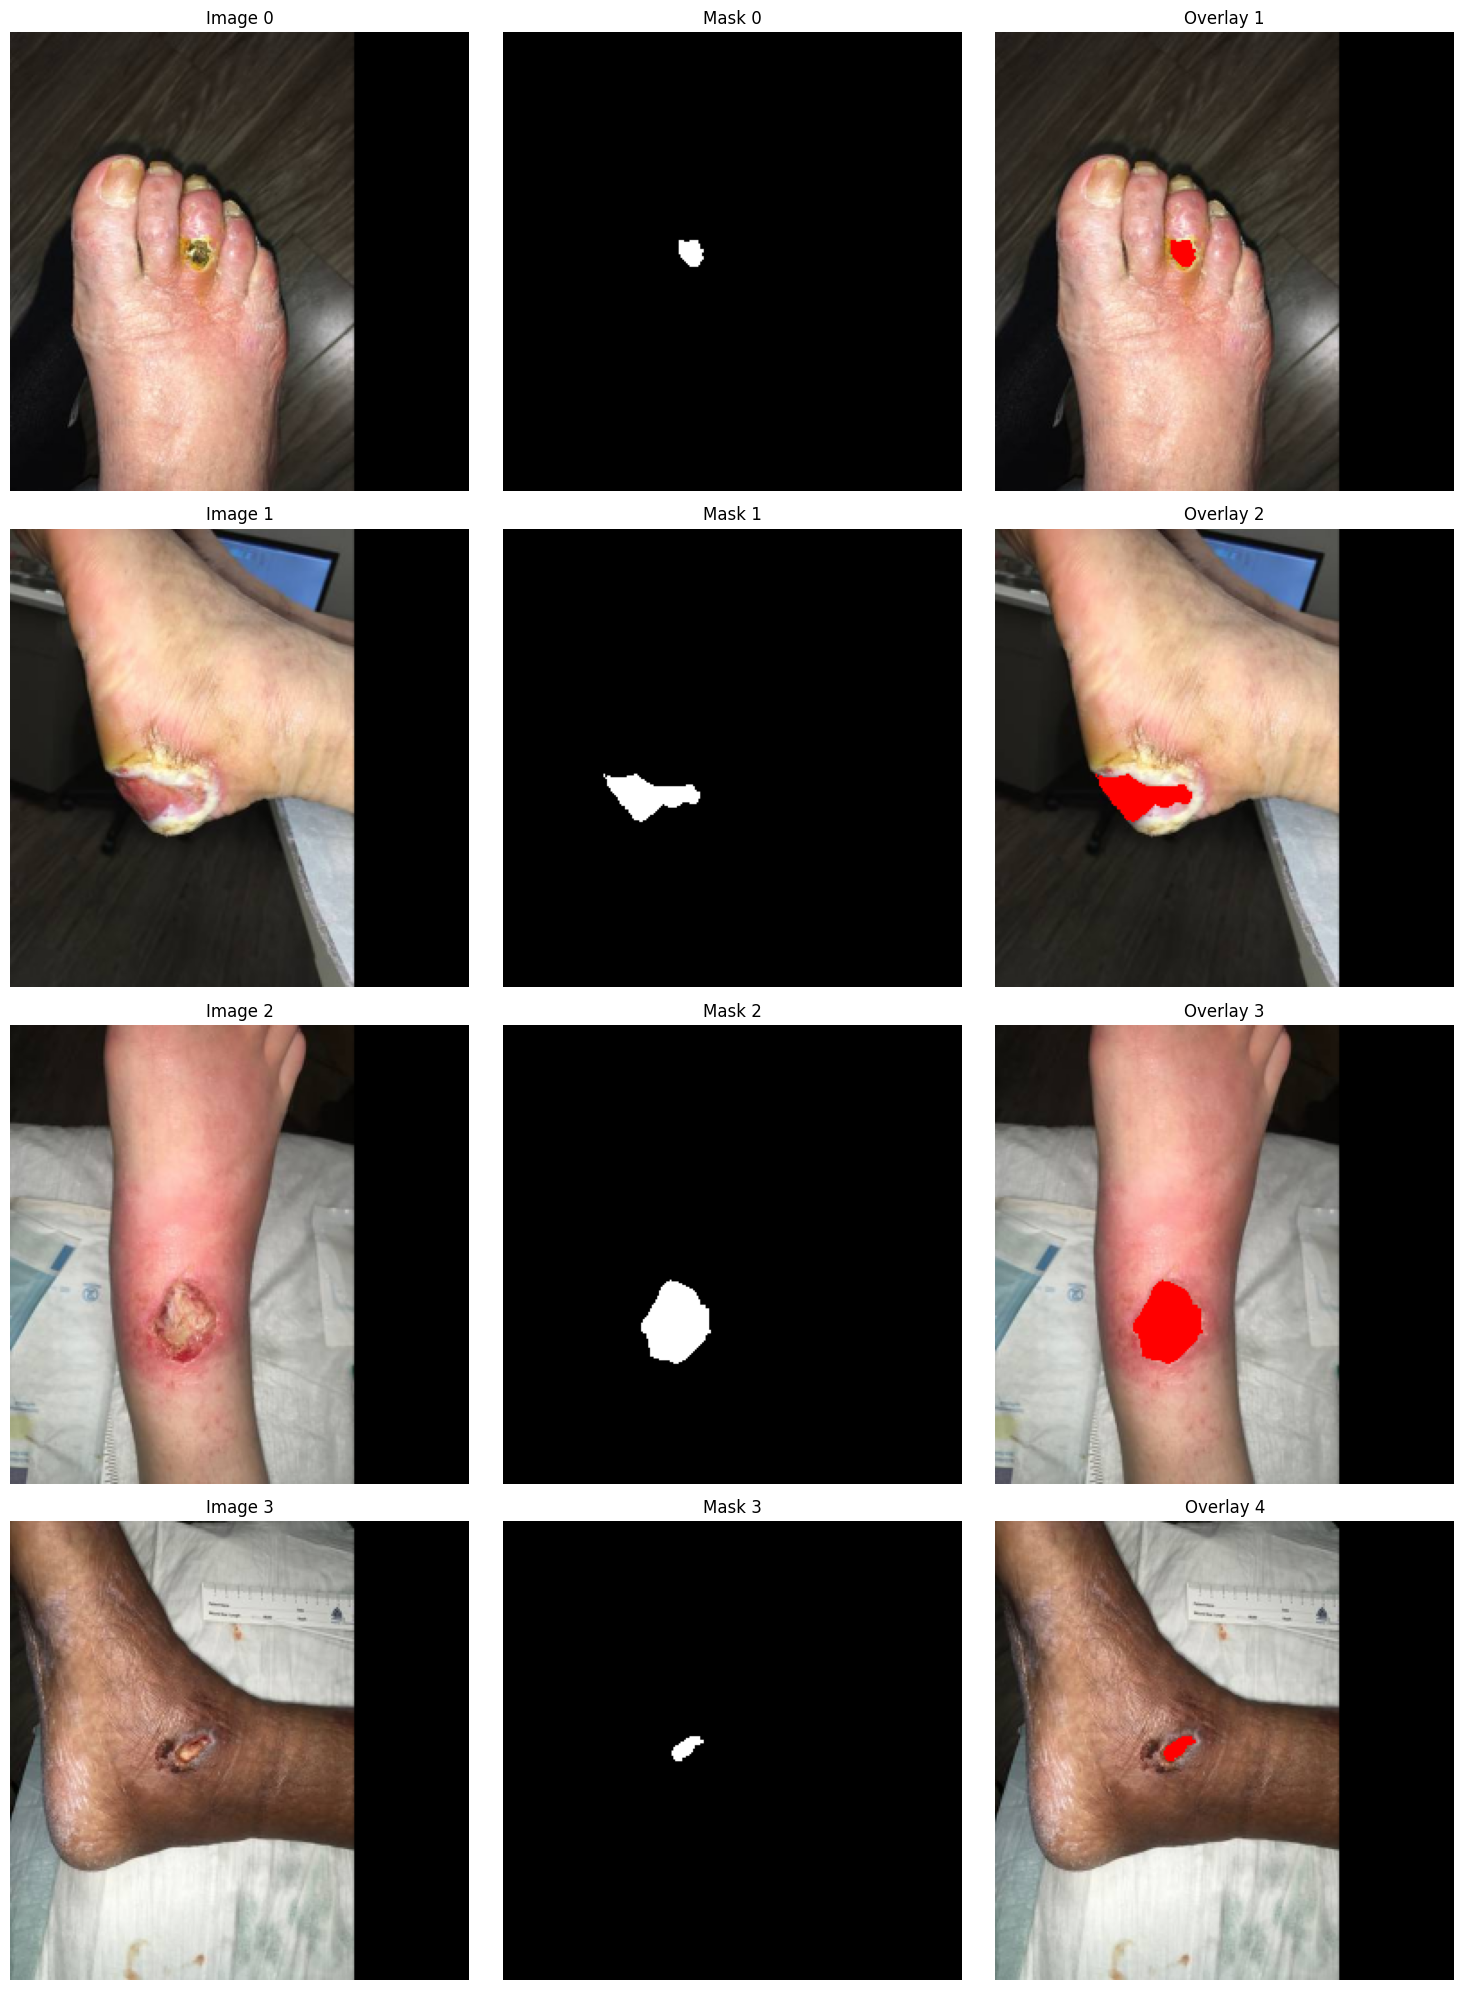

2025-03-21 09:36:13.346884: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
val_set.show_samples()

In [38]:
# create training and validation datasets
train_dataset = train_set.create()
val_dataset = val_set.create()

# check shapes
for img_batch, mask_batch in train_dataset.take(1):
    print(img_batch.shape, mask_batch.shape)

for img_batch, mask_batch in val_dataset.take(1):
    print(img_batch.shape, mask_batch.shape)

(4, 256, 256, 3) (4, 256, 256, 1)
(4, 256, 256, 3) (4, 256, 256, 1)


2025-03-21 09:36:32.220485: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
# examine images and masks
it = train_dataset.as_numpy_iterator()
img_batch, mask_batch = next(it)

print(img_batch[0].max(), img_batch[0].min()) # should be between 0 and 1 (normalised)
print(mask_batch[0].max(), mask_batch[0].min()) # should be 0 or 1 (binarised)

1.0 0.0
1.0 0.0


In [ ]:
# References used:
# https://arxiv.org/abs/1505.04597, 
# https://medium.com/geekculture/u-net-implementation-from-scratch-using-tensorflow-b4342266e406
# https://www.tensorflow.org/tutorials/images/segmentation

from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Concatenate, Conv2DTranspose  # type: ignore
from keras import Model, Input # type: ignore
import tensorflow as tf # type: ignore
import keras # type: ignore

@keras.saving.register_keras_serializable(package="my_models", name="UNet")
class UNet(Model):
    """
        Class that implements the UNet architecture. (With some modifications)
    """

    def __init__(self, input_shape: tuple[int, int, int], n_output_classes: int = 1, n_base_filters: int = 64) -> None:
        """
        Initialise UNet architecture.

        Args:
            n_output_classes: Number of output classes.
            input_shape: Input image shape (height, width, channels). Default is 1.
            n_base_filter: Number of convolutional filters in the first downsampling and upsampling layers. Default is 64.
        """

        super().__init__()  

        # store class attributes
        self.input_shape = input_shape
        self.n_classes = n_output_classes
        self.n_filters = n_base_filters

        # store activation and Conv2D kernel initializer
        self.activation = 'relu'
        self.kernel_init = 'HeNormal'

        # store model
        self._model = self.build_model()

    def get_config(self):
        """
            Return a dictionary containing the constructor arguments to enable model reconstruction.
        """
        # get base config
        config = super().get_config()

        config.update({
            'input_shape': self.input_shape,
            'n_output_classes': self.n_classes,
            'n_base_filters': self.n_filters,
        })

        return config

    def downsampler_block(self, inputs: tf.Tensor, n_filters: int, kernel_size: int = 3) -> tf.Tensor:
        """     
            Single encoder block with Double convolutional layers & batch normalisation layers.

            Args:
                inputs: Tensor output of previous layer.
                n_filters: Number of convolutional filters.
                kernel_size: Height and width of the kernel/filter. Default is 3.
        """

        # pass inputs through the layers
        x = Conv2D(
            filters = n_filters,
            kernel_size = kernel_size,
            padding = 'same',
            kernel_initializer = self.kernel_init
        )(inputs)
        x = Activation(self.activation)(x)

        x = Conv2D(
            filters = n_filters,
            kernel_size = kernel_size,
            padding = 'same',
            kernel_initializer = self.kernel_init
        )(x)
        x = Activation(self.activation)(x)

        return x

    def upsampler_block(self, inputs: tf.Tensor, n_filters: int, skip_connection: tf.Tensor, kernel_size: int = 2) -> tf.Tensor:  
        """
            Single Decoder block with Conv2DTranspose layers, Conv2D layers, and Concatenate.

            Args:
                inputs: Tensor output of previous layer.
                n_filters: Number of convolutional filters.
                skip_connection: Output of the similar level Conv layer from the downsampling section.
                kernel_size: Height and width of the kernel/filter. Default is 2.
        """

        up_conv = Conv2DTranspose(
            filters = n_filters,
            kernel_size = kernel_size,
            strides = 2,
            padding = 'same'
        )(inputs)

        concat = Concatenate()(
            [up_conv, skip_connection]
        )

        x = Conv2D(
            filters = n_filters,
            kernel_size = kernel_size,
            padding = 'same',
            kernel_initializer = self.kernel_init,
            activation = self.activation
        )(concat)

        x = Conv2D(
            filters = n_filters,
            kernel_size = kernel_size,
            padding = 'same',
            kernel_initializer = self.kernel_init, 
            activation = self.activation
        )(x)

        return x
    
    def build_model(self) -> tf.keras.Model:
        """
            Build the entire UNet architecture.
        """

        inputs = Input(shape = self.input_shape)

        # ENCODER (Downsampling)
        d1 = self.downsampler_block(inputs, self.n_filters)
        mp1 = MaxPool2D(pool_size = (2,2))(d1)

        d2 = self.downsampler_block(mp1, 2*self.n_filters)
        mp2 = MaxPool2D(pool_size = (2,2))(d2)

        d3 = self.downsampler_block(mp2, 4*self.n_filters)
        mp3 = MaxPool2D(pool_size = (2,2))(d3)

        d4 = self.downsampler_block(mp3, 8*self.n_filters)
        mp4 = MaxPool2D(pool_size = (2,2))(d4)

        # BOTTLENECK
        bottleneck = self.downsampler_block(mp4, 16*self.n_filters)

        # DECODER (Upsampling)
        u4 = self.upsampler_block(bottleneck, 8*self.n_filters, d4)
        u3 = self.upsampler_block(u4, 4*self.n_filters, d3)
        u2 = self.upsampler_block(u3, 2*self.n_filters, d2)
        u1 = self.upsampler_block(u2, self.n_filters, d1)

        outputs = Conv2D(
            filters = self.n_classes,
            kernel_size = 1,
            padding = 'same',
            activation = 'sigmoid'
        )(u1)

        # create & return model
        return Model(
            inputs = inputs,
            outputs = outputs
        )


    def call(self, inputs: tf.Tensor):
        """
            Forward pass.

            Args:
                inputs: Image input tensors.
        
        """

        return self._model(inputs)

In [66]:
# create model
model = UNet((256, 256, 3))

In [67]:
model.summary()

Model: "u_net_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_3 (Functional)       │ (None, 256, 256, 1)    │    25,809,345 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,809,345 (98.45 MB)

 Trainable params: 25,809,345 (98.45 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(optimizer=tf.keras.optimizers.AdamW(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
# implement early stopping and model checkpoint callbacks

# early stopping to monitor validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

# model checkpoint to save best model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'Checkpoints/unet_best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [73]:
# train the model

model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9843 - loss: 0.0697
Epoch 1: val_loss improved from inf to 0.07735, saving model to Checkpoints/unet_best_model.keras


TypeError: The `get_config()` method of <UNet name=u_net_3, built=True> should return a dict. It returned: None

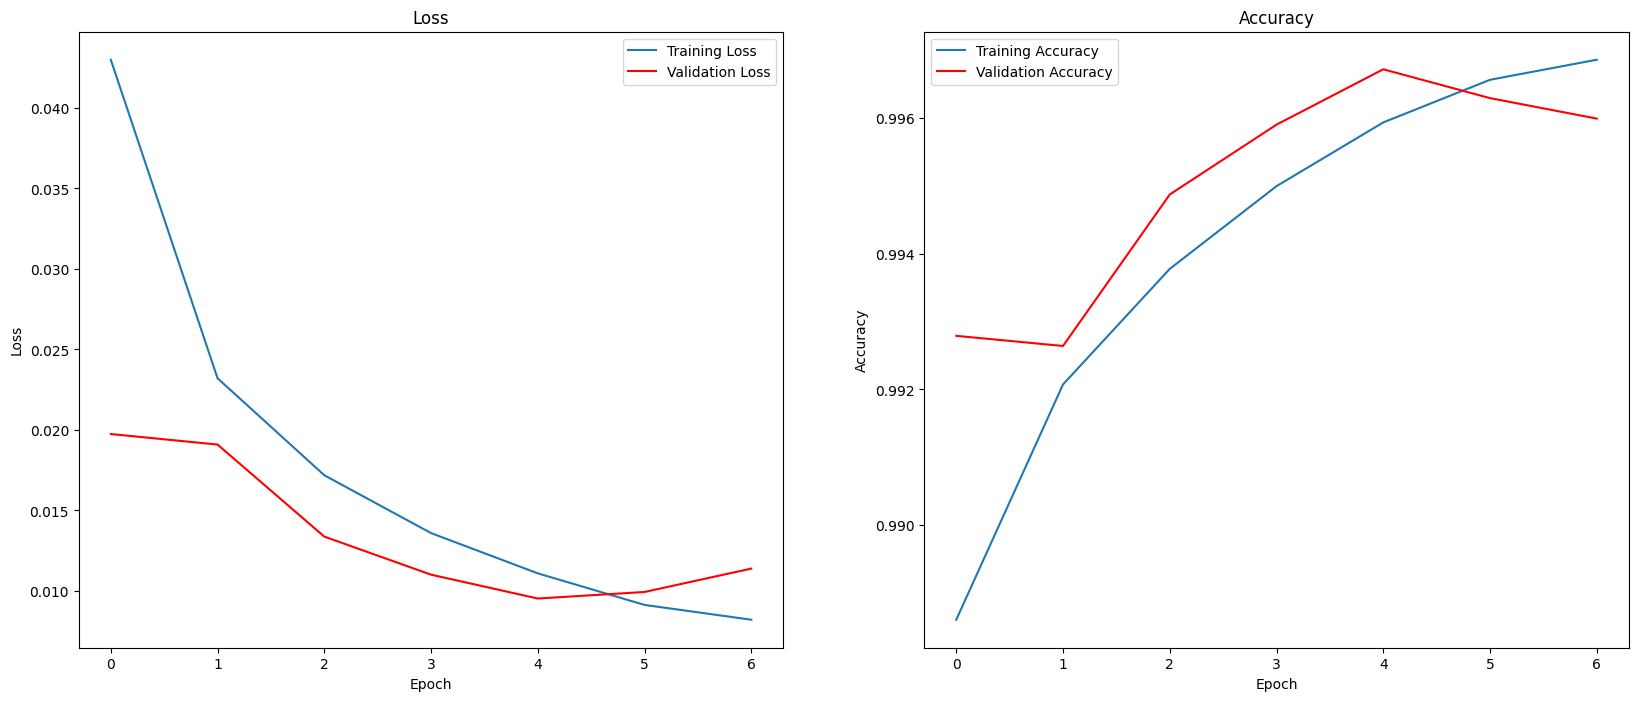

In [62]:
# plot losses and accuracy

def plot_loss_acc(history: tf.keras.callbacks.History) -> None:
    """
        Plot loss and accuracy.

        Args:
            history: History object from model.fit
    """

    plt.figure(figsize=(20, 8))

    # plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_loss_acc(model.history)

In [ ]:
def show_test_results(model: tf.keras.Model, test_imgs_path: str, n_samples: int = 5) -> None:
    """
        Show original test images and predicted masks.

        Args:
            model: Trained model
            test_imgs_path: Path to test images
            n_samples: Number of samples to show. Default is 5.
    """

    # get test images
    test_imgs = os.listdir(test_imgs_path)

    # get random n_samples
    samples = np.random.choice(test_imgs, n_samples)

    for img_file in samples:
        img_path = os.path.join(test_imgs_path, img_file)

        # read image
        img = tf.io.read_file(img_path)
        img = tf.io.decode_image(img, channels = 3, expand_animations=False)
        img = tf.ensure_shape(img, [None, None, 3])

        # resize
        reimg = tf.image.resize(img, (256, 256))
        # normalize
        norm_img = tf.cast(reimg, tf.float32) / 255.0
        # add batch dim
        batch_img = tf.expand_dims(norm_img, axis=0)

        # predict
        pred = model.predict(batch_img)
        # convert to binary mask
        pred_mask = tf.cast(tf.greater(pred, 0.5), tf.float32)

        # plot
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(tf.squeeze(pred_mask)) # squeeze to remove batch dim
        plt.title('Predicted Mask')

        plt.show()

# use model from checkpoint
loaded_model = tf.keras.models.load_model('Checkpoints/unet_best_model.keras', custom_objects={'UNet': UNet})
show_test_results(loaded_model, 'data/test/images')

TypeError: Unable to revive model from config. When overriding the `get_config()` method, make sure that the returned config contains all items used as arguments in the  constructor to <class '__main__.UNet'>, which is the default behavior. You can override this default behavior by defining a `from_config(cls, config)` class method to specify how to create an instance of UNet from its config.

Received config={'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}}

Error encountered during deserialization: UNet.__init__() got an unexpected keyword argument 'trainable'

In [ ]:
# test on other wounds